In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# GHCN Data Over Time

In [2]:
# Read in GHCN dataframe from step 0
path = '/Users/aherron1/Documents/Projects/GISTEMP/GISTEMP_rewrite/results/step0_output.csv'
df = pd.read_csv(path)

# Drop ID column, extract years from column names
df = df.drop(columns=["Station_ID"])
years = df.columns[:-2].str.split('_').str[1].astype(int).unique()

# Create a new DataFrame to store the sum of NaN and non-NaN values for each year
nan_count_yearly_df = pd.DataFrame(index=years, columns=['NaN_count'])
non_nan_count_yearly_df = pd.DataFrame(index=years, columns=['Non_NaN_count'])

# Iterate over each year and calculate the sum of NaN and non-NaN values
for year in years:
    columns_for_year = [col for col in df.columns[:-2] if col.endswith(f"_{year}")]
    nan_count_yearly_df.loc[year, 'NaN_count'] = df[columns_for_year].isna().sum().sum()
    non_nan_count_yearly_df.loc[year, 'Non_NaN_count'] = df[columns_for_year].count().sum()

# Set figure dimensions and marker
marker = '.'
x_dim = 10
y_dim = 6

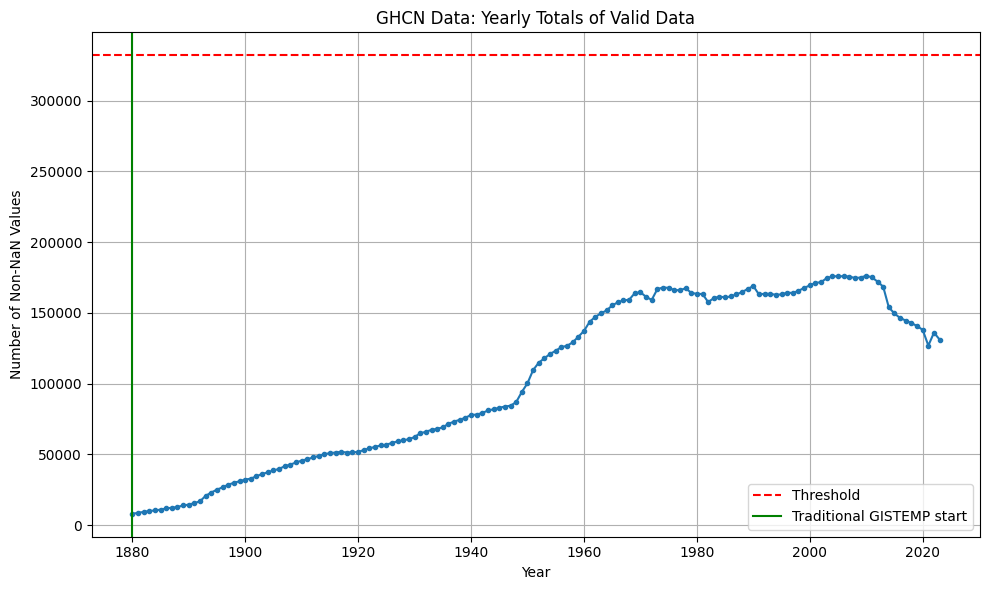

In [3]:
# Plotting
plt.figure(figsize=(x_dim, y_dim))
plt.plot(non_nan_count_yearly_df.index, non_nan_count_yearly_df['Non_NaN_count'], marker=marker)
plt.title('GHCN Data: Yearly Totals of Valid Data')
plt.xlabel('Year')
plt.ylabel('Number of Non-NaN Values')
plt.grid(True)

# Line highlighting total possible values for a given year
num_yearly_values = 12 * len(df)
plt.axhline(y=num_yearly_values, color='r', linestyle='--', label='Threshold')

# Line highlighting regular start of GISTEMP analysis
plt.axvline(x=1880, color='g', label='Traditional GISTEMP start')

plt.legend()
plt.tight_layout()
plt.show()

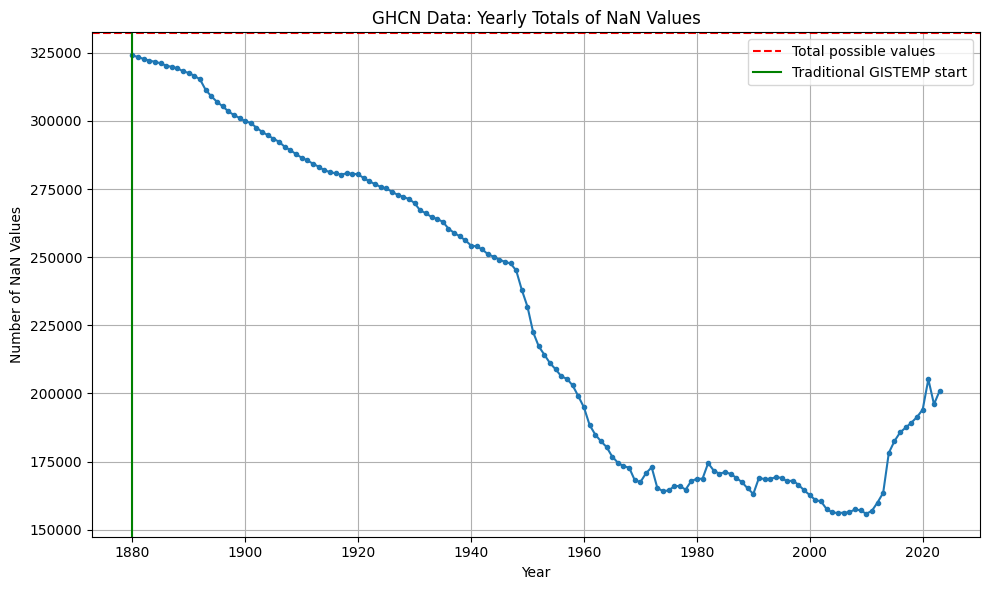

In [4]:
# Plotting
plt.figure(figsize=(x_dim, y_dim))
plt.plot(nan_count_yearly_df.index, nan_count_yearly_df['NaN_count'], marker=marker)
plt.title('GHCN Data: Yearly Totals of NaN Values')
plt.xlabel('Year')
plt.ylabel('Number of NaN Values')
plt.grid(True)

# Line highlighting total possible values for a given year
num_yearly_values = 12 * len(df)
plt.axhline(y=num_yearly_values, color='r', linestyle='--', label='Total possible values')

# Line highlighting regular start of GISTEMP analysis
plt.axvline(x=1880, color='g', label='Traditional GISTEMP start')

plt.legend()
plt.tight_layout()
plt.show()

# Comparison of GISTEMPv4 and GISTEMPv5 Results

## Timeseries

In [17]:
# Set paths
path_v4 = '/Users/aherron1/Documents/Projects/GISTEMP/GISTEMP_rewrite/plots/GISTEMPv4/gistemp1200_GHCNv4_ERSSTv5.nc'
path_v5_1951_1980 = '/Users/aherron1/Documents/Projects/GISTEMP/GISTEMP_rewrite/plots/GISTEMPv5/gistemp_result_1951_1980.nc'
path_v5_1951_1980_ua = '/Users/aherron1/Documents/Projects/GISTEMP/GISTEMP_rewrite/plots/GISTEMPv5/gistemp_result_1951_1980_UA.nc'
path_v5_1961_1990 = '/Users/aherron1/Documents/Projects/GISTEMP/GISTEMP_rewrite/plots/GISTEMPv5/gistemp_result_1961_1990.nc'

# Read in datasets
ds_v4 = xr.open_dataset(path_v4)
ds_v5_1951_1980 = xr.open_dataset(path_v5_1951_1980)
ds_v5_1951_1980_ua = xr.open_dataset(path_v5_1951_1980_ua)
ds_v5_1961_1990 = xr.open_dataset(path_v5_1961_1990)

# Calculate monthly, yearly, 5 & 10-year rolling mean time series for GISTEMPv4
time_series_v4_monthly = ds_v4['tempanomaly'].mean(dim=('lat', 'lon')).resample(time='M').mean(dim='time')
time_series_v4_yearly = ds_v4['tempanomaly'].mean(dim=('lat', 'lon')).resample(time='Y').mean(dim='time')
time_series_v4_5yr = ds_v4['tempanomaly'].mean(dim=('lat', 'lon')).resample(time='5Y').mean(dim='time')
time_series_v4_10yr = ds_v4['tempanomaly'].mean(dim=('lat', 'lon')).resample(time='10Y').mean(dim='time')

# Calculate monthly, yearly, 5 & 10-year rolling mean time series for GISTEMPv5 1951-1980
time_series_v5_1951_1980_monthly = ds_v5_1951_1980['temp'].mean(dim=('lat', 'lon')).resample(time='M').mean(dim='time')
time_series_v5_1951_1980_yearly = ds_v5_1951_1980['temp'].mean(dim=('lat', 'lon')).resample(time='Y').mean(dim='time')
time_series_v5_1951_1980_5yr = ds_v5_1951_1980['temp'].mean(dim=('lat', 'lon')).resample(time='5Y').mean(dim='time')
time_series_v5_1951_1980_10yr = ds_v5_1951_1980['temp'].mean(dim=('lat', 'lon')).resample(time='10Y').mean(dim='time')

# Calculate monthly, yearly, 5 & 10-year rolling mean time series for GISTEMPv5 1951-1980 (urban adjustment)
time_series_v5_1951_1980_ua_monthly = ds_v5_1951_1980_ua['temp'].mean(dim=('lat', 'lon')).resample(time='M').mean(dim='time')
time_series_v5_1951_1980_ua_yearly = ds_v5_1951_1980_ua['temp'].mean(dim=('lat', 'lon')).resample(time='Y').mean(dim='time')
time_series_v5_1951_1980_ua_5yr = ds_v5_1951_1980_ua['temp'].mean(dim=('lat', 'lon')).resample(time='5Y').mean(dim='time')
time_series_v5_1951_1980_ua_10yr = ds_v5_1951_1980_ua['temp'].mean(dim=('lat', 'lon')).resample(time='10Y').mean(dim='time')

# Calculate monthly, yearly, 5 & 10-year rolling mean time series for GISTEMPv5 1951-1980 (urban adjustment)
time_series_v5_1961_1990_monthly = ds_v5_1961_1990['temp'].mean(dim=('lat', 'lon')).resample(time='M').mean(dim='time')
time_series_v5_1961_1990_yearly = ds_v5_1961_1990['temp'].mean(dim=('lat', 'lon')).resample(time='Y').mean(dim='time')
time_series_v5_1961_1990_5yr = ds_v5_1961_1990['temp'].mean(dim=('lat', 'lon')).resample(time='5Y').mean(dim='time')
time_series_v5_1961_1990_10yr = ds_v5_1961_1990['temp'].mean(dim=('lat', 'lon')).resample(time='10Y').mean(dim='time')

# Set figure dimensions and marker
marker = '.'
x_dim = 12
y_dim = 6

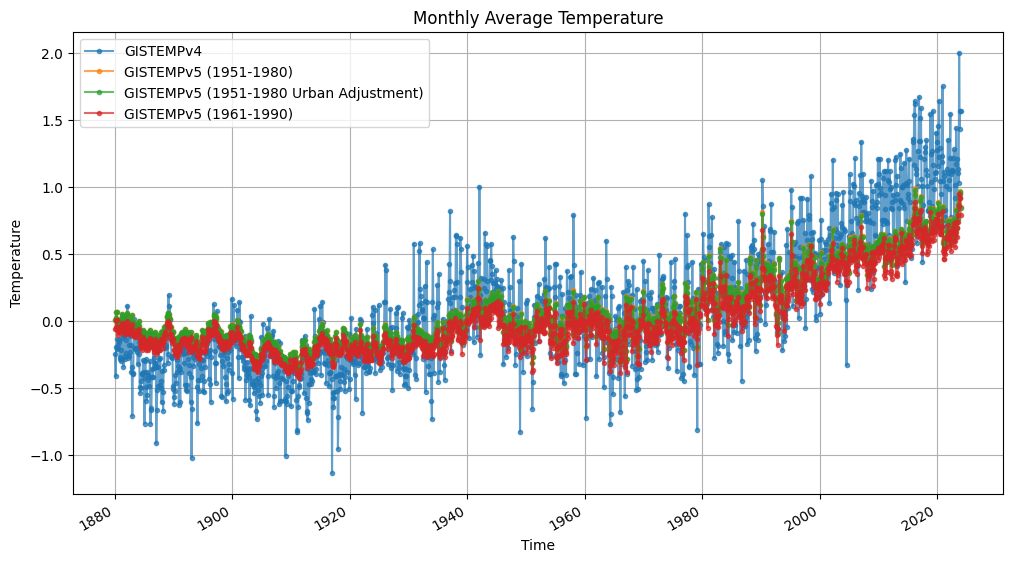

In [18]:
# Plot each timeseries with monthly markers
plt.figure(figsize=(x_dim, y_dim))
time_series_v4_monthly.plot(label='GISTEMPv4', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_monthly.plot(label='GISTEMPv5 (1951-1980)', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_ua_monthly.plot(label='GISTEMPv5 (1951-1980 Urban Adjustment)', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1961_1990_monthly.plot(label='GISTEMPv5 (1961-1990)', marker=marker, linestyle='-', alpha=0.7)

# Customize the plot (optional)
plt.title('Monthly Average Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

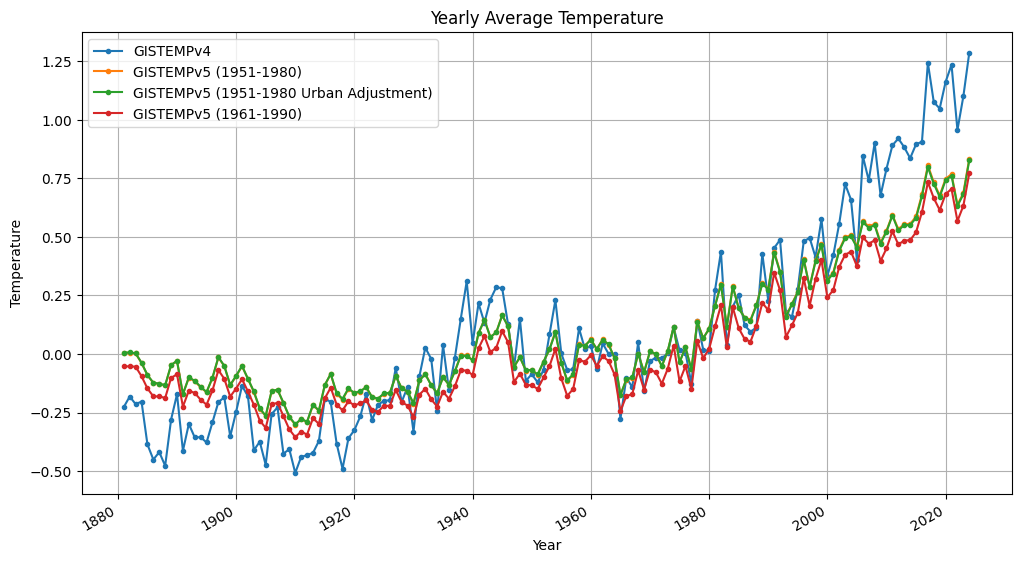

In [19]:
# Plot each timeseries
plt.figure(figsize=(x_dim, y_dim))
time_series_v4_yearly.plot(label='GISTEMPv4', marker=marker)
time_series_v5_1951_1980_yearly.plot(label='GISTEMPv5 (1951-1980)', marker=marker)
time_series_v5_1951_1980_ua_yearly.plot(label='GISTEMPv5 (1951-1980 Urban Adjustment)', marker=marker)
time_series_v5_1961_1990_yearly.plot(label='GISTEMPv5 (1961-1990)', marker=marker)

# Customize the plot (optional)
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

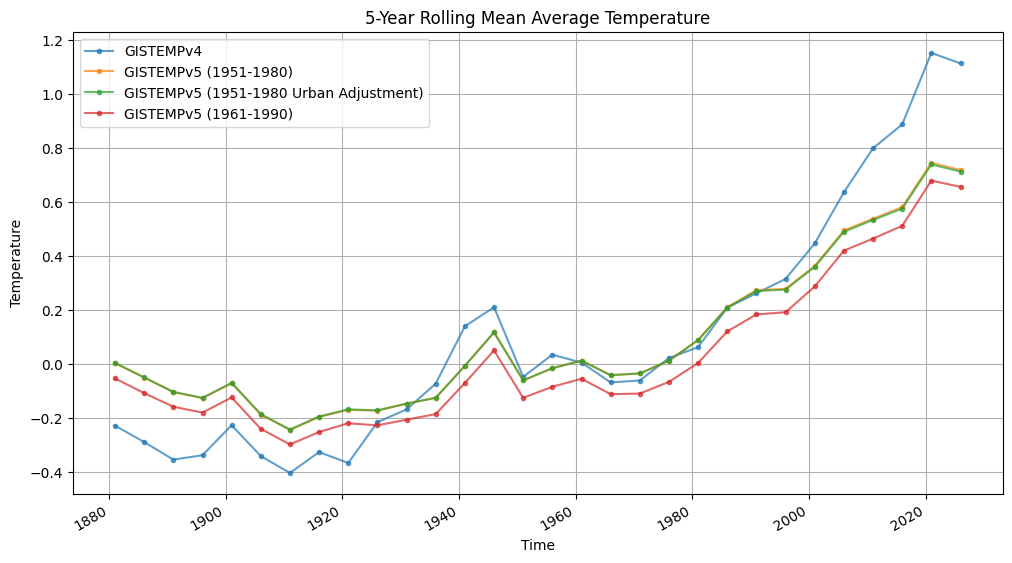

In [20]:
# Plot each timeseries with 5-year averages
plt.figure(figsize=(x_dim, y_dim))
time_series_v4_5yr.plot(label='GISTEMPv4', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_5yr.plot(label='GISTEMPv5 (1951-1980)', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_ua_5yr.plot(label='GISTEMPv5 (1951-1980 Urban Adjustment)', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1961_1990_5yr.plot(label='GISTEMPv5 (1961-1990)', marker=marker, linestyle='-', alpha=0.7)

# Customize the plot (optional)
plt.title('5-Year Rolling Mean Average Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

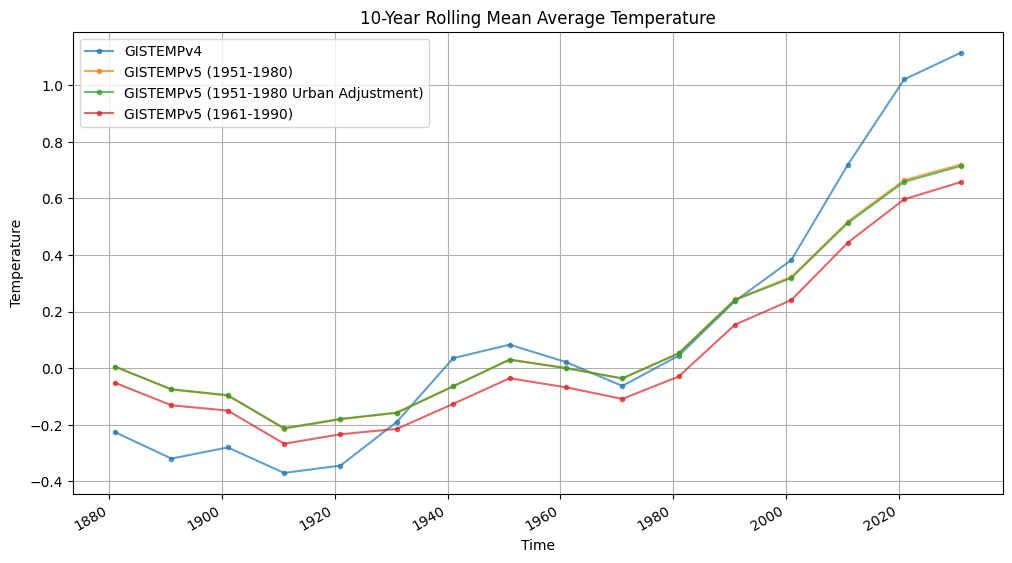

In [21]:
# Plot each timeseries with 10-year averages
plt.figure(figsize=(x_dim, y_dim))
time_series_v4_10yr.plot(label='GISTEMPv4', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_10yr.plot(label='GISTEMPv5 (1951-1980)', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_ua_10yr.plot(label='GISTEMPv5 (1951-1980 Urban Adjustment)', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1961_1990_10yr.plot(label='GISTEMPv5 (1961-1990)', marker=marker, linestyle='-', alpha=0.7)

# Customize the plot (optional)
plt.title('10-Year Rolling Mean Average Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Multiply v5 by scaling factor

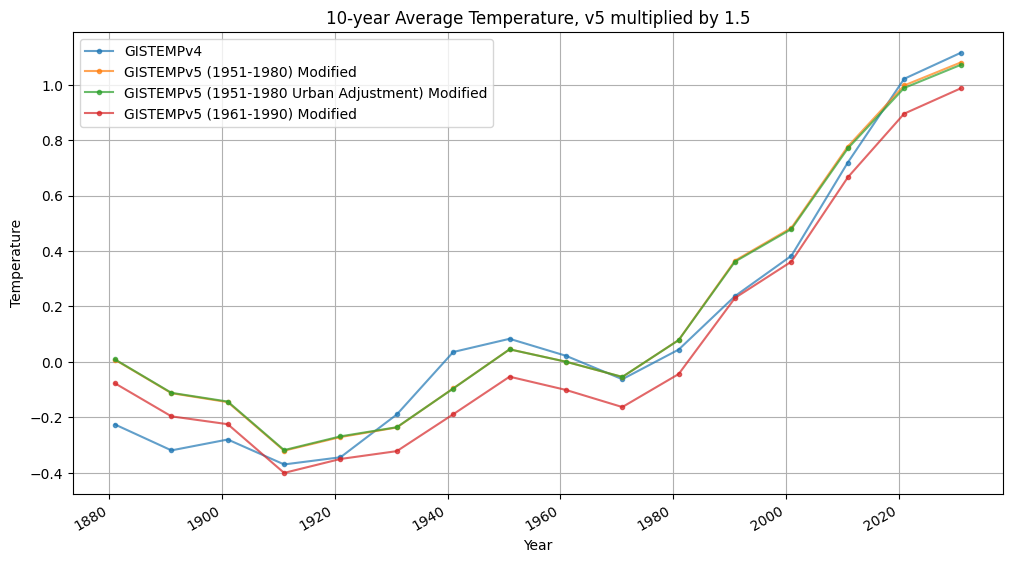

In [31]:
scaling_factor = 1.5

# Multiply each time series by 2
time_series_v5_1951_1980_10yr_modified = time_series_v5_1951_1980_10yr * scaling_factor
time_series_v5_1951_1980_ua_10yr_modified = time_series_v5_1951_1980_ua_10yr * scaling_factor
time_series_v5_1961_1990_10yr_modified = time_series_v5_1961_1990_10yr * scaling_factor

# Plot each timeseries
plt.figure(figsize=(x_dim, y_dim))
time_series_v4_10yr.plot(label='GISTEMPv4', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_10yr_modified.plot(label='GISTEMPv5 (1951-1980) Modified', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1951_1980_ua_10yr_modified.plot(label='GISTEMPv5 (1951-1980 Urban Adjustment) Modified', marker=marker, linestyle='-', alpha=0.7)
time_series_v5_1961_1990_10yr_modified.plot(label='GISTEMPv5 (1961-1990) Modified', marker=marker, linestyle='-', alpha=0.7)

# Customize the plot (optional)
plt.title(f'10-year Average Temperature, v5 multiplied by {scaling_factor}')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


# Plot differences between v4 and v5

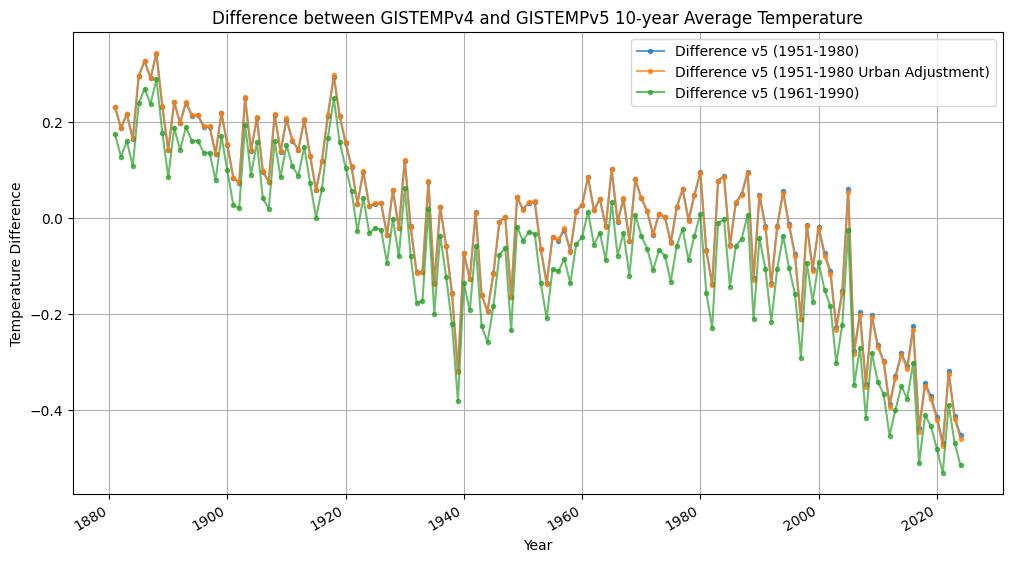

In [34]:
# Calculate the differences
diff_v5_1951_1980 = time_series_v5_1951_1980_yearly - time_series_v4_yearly
diff_v5_1951_1980_ua = time_series_v5_1951_1980_ua_yearly - time_series_v4_yearly
diff_v5_1961_1990 = time_series_v5_1961_1990_yearly - time_series_v4_yearly

# Plot each difference
plt.figure(figsize=(x_dim, y_dim))
diff_v5_1951_1980.plot(label='Difference v5 (1951-1980)', marker=marker, linestyle='-', alpha=0.7)
diff_v5_1951_1980_ua.plot(label='Difference v5 (1951-1980 Urban Adjustment)', marker=marker, linestyle='-', alpha=0.7)
diff_v5_1961_1990.plot(label='Difference v5 (1961-1990)', marker=marker, linestyle='-', alpha=0.7)

# Customize the plot (optional)
plt.title('Difference between GISTEMPv4 and GISTEMPv5 10-year Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.legend()
plt.grid(True)
plt.show()

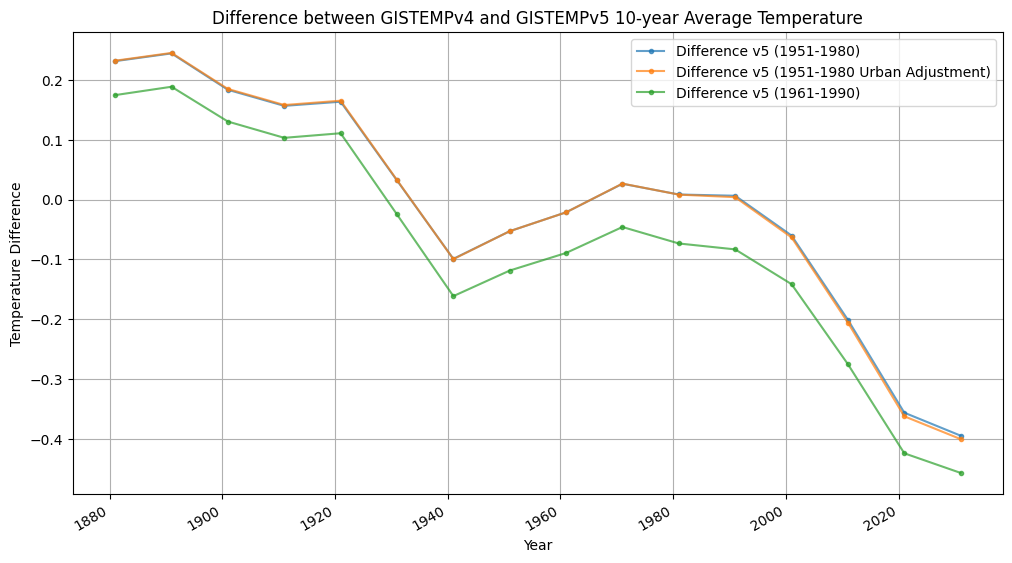

In [32]:
# Calculate the differences
diff_v5_1951_1980 = time_series_v5_1951_1980_10yr - time_series_v4_10yr
diff_v5_1951_1980_ua = time_series_v5_1951_1980_ua_10yr - time_series_v4_10yr
diff_v5_1961_1990 = time_series_v5_1961_1990_10yr - time_series_v4_10yr

# Plot each difference
plt.figure(figsize=(x_dim, y_dim))
diff_v5_1951_1980.plot(label='Difference v5 (1951-1980)', marker=marker, linestyle='-', alpha=0.7)
diff_v5_1951_1980_ua.plot(label='Difference v5 (1951-1980 Urban Adjustment)', marker=marker, linestyle='-', alpha=0.7)
diff_v5_1961_1990.plot(label='Difference v5 (1961-1990)', marker=marker, linestyle='-', alpha=0.7)

# Customize the plot (optional)
plt.title('Difference between GISTEMPv4 and GISTEMPv5 10-year Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.legend()
plt.grid(True)
plt.show()


# Comparison of GISTEMPv4 and GISTEMPv5 Results

## Statistics

In [10]:
dataset_dict = {
    'GISTEMPv5 1951-1980': ds_v5_1951_1980,
    'GISTEMPv5 1951-1980 Urban Adjustment': ds_v5_1951_1980_ua,
    'GISTEMPv5 1961-1990': ds_v5_1961_1990
}

In [13]:
def statistics(ds_v5):

    # Calculate average global values for GISTEMPv4 and input dataset
    time_series_v4 = ds_v4['tempanomaly'].mean(dim=('lat', 'lon'))
    time_series_v5 = ds_v5['temp'].mean(dim=('lat', 'lon'))

    # Convert xarray DataArrays to NumPy arrays
    time_series_v4_np = time_series_v4.values
    time_series_v5_np = time_series_v5.values

    # Handle missing or invalid values
    valid_mask = ~np.isnan(time_series_v4_np) & ~np.isnan(time_series_v5_np)
    time_series_v4_valid = time_series_v4_np[valid_mask]
    time_series_v5_valid = time_series_v5_np[valid_mask]

    # Calculate metrics with valid data
    correlation_coefficient = np.corrcoef(time_series_v5_valid, time_series_v4_valid)[0, 1]
    mae = np.abs(time_series_v4_valid - time_series_v5_valid).mean()
    mse = ((time_series_v4_valid - time_series_v5_valid)**2).mean()
    rmse = np.sqrt(mse)

    # Calculate variance for GISTEMPv4 and GISTEMPv5
    variance_v4 = np.var(time_series_v4_valid)
    variance_v5 = np.var(time_series_v5_valid)

    # Print or use the calculated metrics
    print(f"    Pearson correlation coefficient: {correlation_coefficient}")
    print(f"    MAE: {mae}")
    print(f"    MSE: {mse}")
    print(f"    RMSE: {rmse}")
    print(f"    Variance (GISTEMPv4): {variance_v4}")
    print(f"    Variance (GISTEMPv5): {variance_v5}\n")

In [14]:
for key, value in dataset_dict.items():
    print(f'Statistical comparison between GISTEMPv4 and {key}')
    statistics(value)

Statistical comparison between GISTEMPv4 and GISTEMPv5 1951-1980
    Pearson correlation coefficient: 0.9130050446060656
    MAE: 0.19149804818530083
    MSE: 0.062459338994230194
    RMSE: 0.2499186647576171
    Variance (GISTEMPv4): 0.23391853272914886
    Variance (GISTEMPv5): 0.08308715011800283

Statistical comparison between GISTEMPv4 and GISTEMPv5 1951-1980 Urban Adjustment
    Pearson correlation coefficient: 0.9125016054426787
    MAE: 0.1928902834141206
    MSE: 0.06337027403947958
    RMSE: 0.2517345308841828
    Variance (GISTEMPv4): 0.23391853272914886
    Variance (GISTEMPv5): 0.0816698559637476

Statistical comparison between GISTEMPv4 and GISTEMPv5 1961-1990
    Pearson correlation coefficient: 0.9145611201891557
    MAE: 0.19816239464917515
    MSE: 0.0688304193731251
    RMSE: 0.26235552095034154
    Variance (GISTEMPv4): 0.23391853272914886
    Variance (GISTEMPv5): 0.0798917833475936

